# Lambda School, Intro to Data Science, Day 4

## Inferential Statistics Assignment

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import random
from statistics import mean, stdev

# Titanic

Use the [`describe` function in pandas](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html) to calculate summary statistics (including mean and standard deviation) for `age` and `fare`.

Think, and be ready to discuss: How do these two features compare in their central tendency and in their spread?

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/titanic.csv', index_col=0)
features = ['age', 'fare']
df.dropna(subset=features, inplace=True)

In [0]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514
std,0.491460,0.838250,14.526497,0.929783,0.853289,52.918930
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.125000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.741700
75%,1.000000,3.000000,38.000000,1.000000,1.000000,33.375000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


In [0]:
df['age'].isnull().sum()

0

In [0]:
df['age'].isnull().sum()

0

In [0]:
#coefficient of variation of age

coef_var_age = df['age'].std()/df['age'].mean()
coef_var_age

0.4891221855465675

In [0]:
# coefficient of variation of Fare
coef_var_fare = df['fare'].std()/df['fare'].mean()
coef_var_fare

1.525282339853458

We can say that the distrubution of the age is close to the mean as its CV is less than 1 whereas for the fare data the stdev is large as the CV is greater than 1 therefore this mean that the fare value arent close to  the mean hence unpredictable

Plot histograms for both features.

Think, and be ready to discuss: What do you notice about the shape of these distributions?

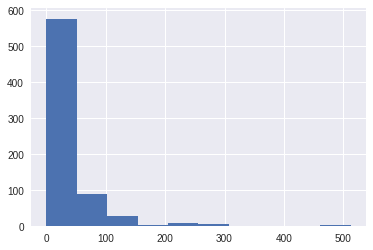

In [0]:
histo_fare = plt.hist(df['fare'])
histo_fare;


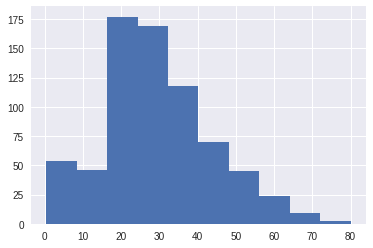

In [0]:
histo_age = plt.hist(df['age'])
histo_age;

From the histogram we can see that the age is tending towards the normal bell curve whereas the fare display a non normal distribution

# Clumsy Carl

Re-do the Clumsy Carl problem -- but suppose that Carl broke **2** of 5 dishes. What's the p-value?

Think, and be ready to discuss: Would you reject the null hypothesis?

Suggestion: You can look at the lecture notebook, but **don't copy-paste** from it!

> You must type each of these exercises in, manually. If you copy and paste, you might as well not even do them. The point of these exercises is to train your hands, your brain, and your mind in how to read, write, and see code. If you copy-paste, you are cheating yourself out of the effectiveness of the lessons. —*[Learn Python the Hard Way](https://learnpythonthehardway.org/book/intro.html)*

---

Here's the problem restated:

Imagine a restaurant employs five dishwashers:
- Alice
- Bob
- Carl
- Dave
- Eric

One week, they break five dishes -- and Carl breaks **two** of the five. So, his coworkers have a hypothesis: Carl is clumsy!

Carl says no, it was just bad luck and random chance: it could have happened to anybody. We can call this the null hypothesis.

Can we do some math to help answer this argument? What's the probability it was just bad luck?

We can write a Monte Carlo simulation to estimate the probability that Carl breaks at least four of the five dishes, assuming that breaking a dish is a truly random event. (We'll assume that the dishwashers have identical workloads and skills.)


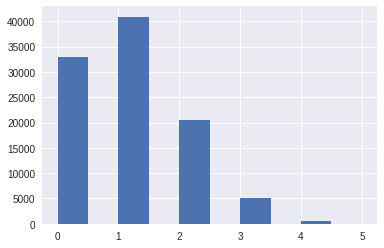

In [0]:
def checky():
    dishwashers = ['Alice', 'Bob', 'Carl', 'Dave', 'Eric']
    breakers = [random.choice(dishwashers)for _ in range(5)]
    return breakers.count('Carl')
  
checks = [checky() for _ in range(100000)]
plt.hist(checks);

In [0]:

# the mean number of dishes broken by Carl and the standard deviation
mean(checks), stdev(checks)

(0.99794, 0.8941273684646447)

In [0]:
#The standard score of Carl  breaking 2 dishes
stand_score = (2 - mean(checks))/stdev(checks)
stand_score

1.1207128149099075

In [0]:
#how often does Carl breaks 2 or more dishes

see = sum([check >=2 for check in checks])
see

26206

In [0]:
#P- value of the null hypothesis
p_value = mean([check >=2 for check in checks])
p_value

0.26206

reject the P_value?

In [0]:
p_value < .05

False

# Two dice

Simulate the distribution of adding two dice.

What is the mean? Standard deviation?

In [0]:
def test():
  """
  Simulating the distribution of adding two dice
  """
  return [random.randint(1,6)+ random.randint(1,6)for _ in range(100000)]
dw = test()


What is the mean? Standard deviation?

In [0]:
mean(dw), stdev(dw)

(7.00219, 2.4236468275182848)

What is the standard score (z score) of rolling a 10?

In [0]:
stan_score_10 = (10 - mean(dw))/stdev(dw)
stan_score_10

1.2369005112306874

What is the probability of rolling a 10 or higher?

In [0]:
p_of_roll_10 = sum([dwy >=10for dwy in dw])
p_of_roll_10

16750

# Harvest

Using bootstrap resampling, calculate the 95% confidence interval for mean apple weight ...

In [0]:
def bootstrap_sample(items):
    # Random resample *with replacement*
    return random.choices(items, k=len(items))

def percentile(x, p):
    # x: List of numbers
    # p: Percentile, between 0 and 100
    i = round(len(x) * p/100)
    return sorted(x)[i]

apples = [.5, .4, .5, .6, .3, .7]

In [0]:
boo_apple = bootstrap_sample(apples)

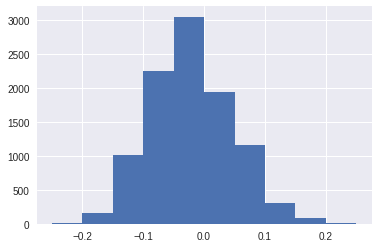

In [0]:
effect_sizes = [mean(bootstrap_sample(apples)) - mean(bootstrap_sample(boo_apple))for _ in range(10000)]
plt.hist(effect_sizes);


In [0]:
# 95 percentil confidence interval of apples
percentile(effect_sizes, 95)

0.09999999999999998

... and for mean pumpkin weight:

In [0]:
pumpkins = [1, 1, 1, 3, 3, 591]

In [0]:
boo_pumpkins = bootstrap_sample(pumpkins)



In [0]:
effect_size2 = [mean(bootstrap_sample(boo_pumpkins))- mean(bootstrap_sample(pumpkins))for _ in range(10000)]


In [0]:
# The 95 confidence interval for pumpkins
percentile(effect_size2, 95)

1.3333333333333333